In [1]:
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import statistics as st

In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
import seaborn as sns

In [4]:
df = sns.load_dataset("tips")

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
np.mean(df["total_bill"])

19.78594262295082

In [8]:
np.median(df["total_bill"])

17.795

In [21]:
st.mode(df["total_bill"])

13.42

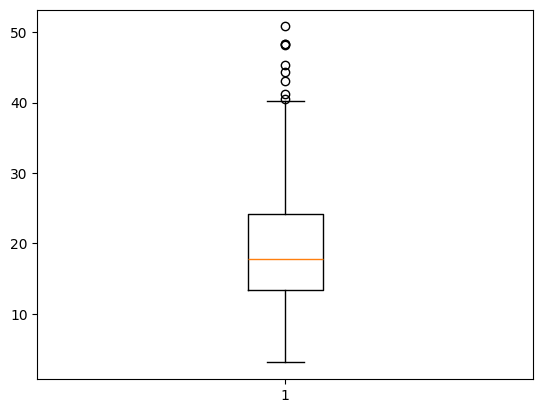

In [18]:
plt.boxplot(df['total_bill'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x233bdbfe890>,
 'caps': [<matplotlib.lines.Line2D at 0x233bdbfed70>,
 'boxes': [<matplotlib.lines.Line2D at 0x233bdbfe590>],
 'medians': [<matplotlib.lines.Line2D at 0x233bdbff370>],
 'fliers': [<matplotlib.lines.Line2D at 0x233bdbff5b0>],
 'means': []}

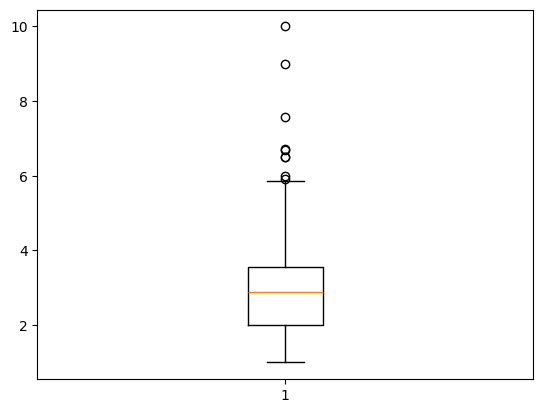

In [23]:
plt.boxplot(df['tip'])  #### dots you see here as some outliers

<Axes: xlabel='total_bill', ylabel='Count'>

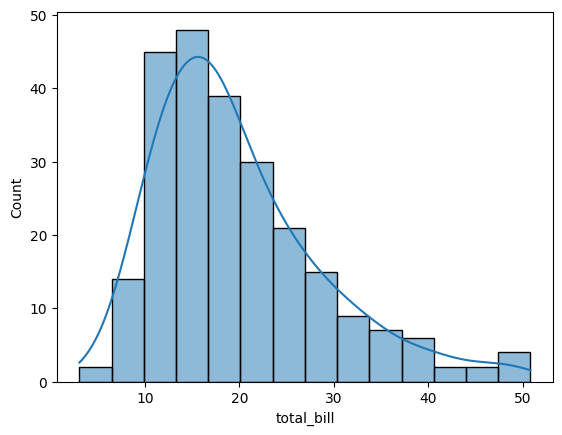

In [27]:
sns.histplot(df['total_bill'],kde = True)

In [9]:
df1 = sns.load_dataset("iris")

In [10]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df1['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

<Axes: xlabel='sepal_width', ylabel='Count'>

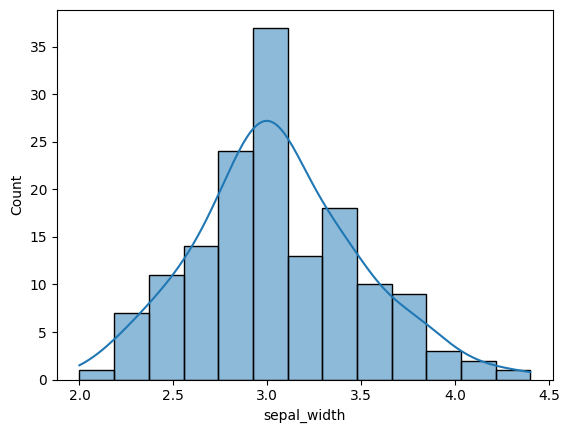

In [30]:
sns.histplot(df1['sepal_width'],kde = True)

<Axes: ylabel='sepal_width'>

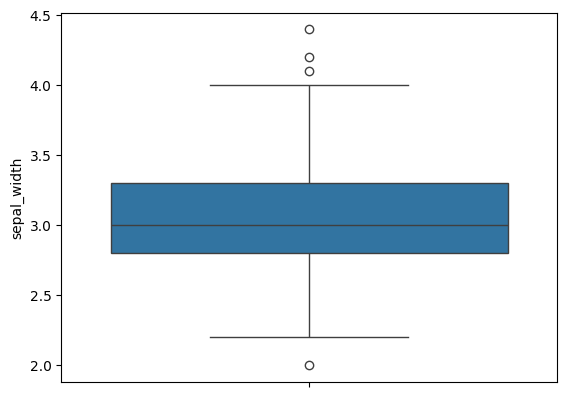

In [31]:
sns.boxplot(df1['sepal_width'])

### Five(5) Number Summary
* Minimum
* first Quaritle
* Median
* Third Quartile
* Maximum

In [32]:
np.mean(df1['sepal_width'])

3.0573333333333337

In [33]:
np.median(df1['sepal_width'])

3.0

In [34]:
st.mode(df1['sepal_width'])

3.0

In [37]:
np.percentile(df1['sepal_width'],[25,75])

array([2.8, 3.3])

### finding outliers with help of Z-Score

zscore = xi- mean / SD

In [5]:
data = df["total_bill"]

In [7]:
data

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [6]:
def outliers(data):
    mean = np.mean(data)
    threshold = 3
    sd = st.stdev(data)
    out = []
    for i in data:
        zscore= (i-mean)/sd
        if np.abs(zscore)>threshold:
            out.append(i)
    return out



In [9]:
outliers(data) ### these values are greater than the 3rd standard deviation

[48.27, 48.17, 50.81, 48.33]

### IQR

Following steps to find IQR

* Sort
* first quartile (Q1)
* Third Quartile (Q3)
* IQR = Q3-Q1
* lower Fence = Q1-1.5(IQR)
* Upper Fence = Q3 + 1.5(IQR)

In [14]:
def IQR(data):
    data = data.sort_values().reset_index(drop=True)
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lF = q1 - (1.5*iqr)
    uF = q3 + (1.5*iqr)
    out = []
    for i in data:
        if i>lF and i<uF:
            continue
        else:
            out.append(i)

    return out


In [15]:
IQR(data)

[40.55, 41.19, 43.11, 44.3, 45.35, 48.17, 48.27, 48.33, 50.81]

### T-test

In [3]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 4.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 8.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.8 MB 7.3 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.8 MB 6.2 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 5.9 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 5.5 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 5.2 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import scipy.stats as sp
import random
from  statsmodels.stats.weightstats import ztest

In [7]:
ages = [12,21,23,23,34,34,45,45,56,56,67,67,78,89,87,65,43,34,32,23]
mean_1 = np.mean(ages)
mean_1

46.7

In [27]:
age_sample = 8
age_sample = np.random.choice(ages,age_sample)

In [28]:
sp.ttest_1samp(age_sample,46.5)

TtestResult(statistic=0.31630462293035994, pvalue=0.7609946237218708, df=7)

In [29]:
sp.ttest_1samp(age_sample,46)

TtestResult(statistic=0.37655312253614276, pvalue=0.7176600048819068, df=7)

In [30]:
sp.ttest_1samp(age_sample,47)

TtestResult(statistic=0.25605612332457706, pvalue=0.8052692494016205, df=7)

In [31]:
sp.ttest_1samp(age_sample,48)

TtestResult(statistic=0.1355591241130114, pvalue=0.8959857080810487, df=7)

In [32]:
sp.ttest_1samp(age_sample,45)

TtestResult(statistic=0.49705012174770846, pvalue=0.6343826406237311, df=7)

In [3]:
np.random.seed(6)
school_ages= sp.poisson.rvs(loc = 18,mu = 35, size = 1500)
class_ages = sp.poisson.rvs(loc = 18,mu = 30, size = 60)


In [4]:
school_ages

array([62, 59, 44, ..., 45, 52, 50], dtype=int64)

In [5]:
class_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45], dtype=int64)

In [6]:
class_ages.mean()


46.9

In [9]:
_,__ = sp.ttest_1samp(class_ages,popmean=school_ages.mean())

In [8]:
school_ages.mean()

53.303333333333335

In [13]:
if __<= 0.05:
    print("Reject the Null Hypothesis")
else:
    print('Accept Ho')

Reject the Null Hypothesis


In [11]:
import seaborn as sns
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


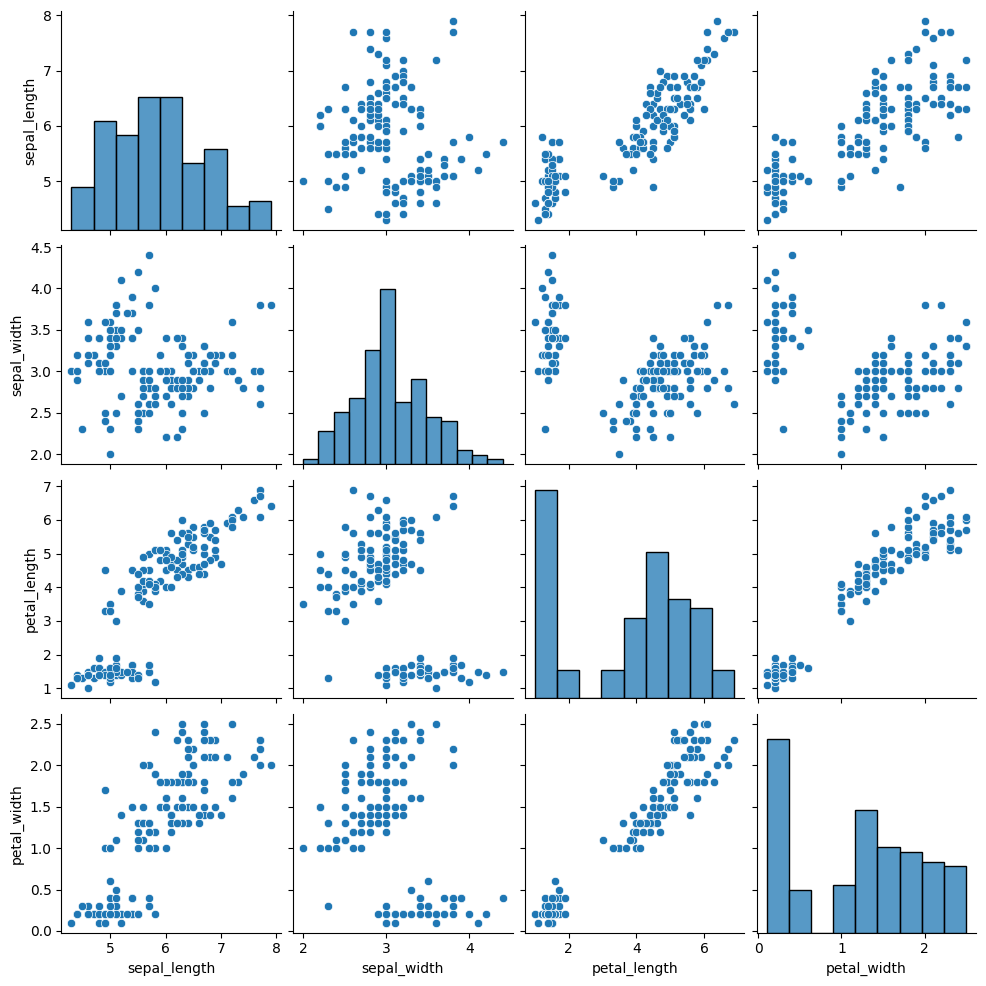

In [14]:
sns.pairplot(df)